In [89]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [90]:
from LoadMultiFiles import LoadOneFileUproot
options_h_time = ""
v_tags_to_load = ["pES", "eES", "AfterPulse"]
dir_evts = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root{options_h_time}/user_PSD_0_SN.root",name_branch="evt",         return_list=False)
dir_PSD = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root{options_h_time}/user_PSD_0_SN.root", name_branch="PSD",         return_list=False)
dir_map = LoadOneFileUproot(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_0.root", name_branch='evtTruth', return_list=False)
dir_tagAP=LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/try_0.root", name_branch="AfterPulseTag", return_list=False )

In [91]:
import uproot as up
with up.open("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/IBDSelection/scan_8_4.root") as f:
    v_IBD_tag = np.array( f["Event/OEC/OECEvent/OECEvent/i_tag"] )
    print(len(v_IBD_tag))

18668


In [92]:
import pandas as pd
from DictTools import RenameDict
RenameDict(dir_PSD, key_old="evtType", key_new="evtType_PSD")
dir_PSD.update(dir_evts)
dir_PSD.update(dir_map)
dir_PSD.update(dir_tagAP)

In [93]:
df_PSD = pd.DataFrame.from_dict( dir_PSD )
df_PSD["evtType_PSD"] = df_PSD["evtType_PSD"].replace({1:"Electron", 2:"Proton"})
df_PSD["IBD_Tag"] = v_IBD_tag
df_PSD["IBD_Tag"] = df_PSD["IBD_Tag"].replace({1:"Single", 4:"Single", 20:"Single", 49:"Single", 33:"IBDd", 17:"IBDp"})
df_PSD


,psdVal,evtType_PSD,evtID,h_time_without_charge,h_time_with_charge,XYZ,Erec,evtID_PSD,nuE,evtType,...,TriggerTimeInterval,fileNo,detID,entryCalib,entryGen,TotalCharge_lastEvt,TriggerTimeIntervalWithFilter,TotalCharge,TagAP,IBD_Tag
0,4.332481e-03,Proton,0,"[2.0, 1.0, 3.0, 10.0, 6.0, 10.0, 21.0, 20.0, 2...","[1.6775330851776984, 0.10570116456871365, 3.34...","[-4925.322265625, -2619.566650390625, 3983.017...",0.212583,0,19.983615,pES,...,0.0,0,6,0,6,0.000000,1000.000,744.910091,0,Single
1,9.998755e-01,Electron,1,"[25.0, 87.0, 212.0, 437.0, 776.0, 1073.0, 1464...","[1341.36388627977, 4713.022755961597, 8019.471...","[-6283.85009765625, 12852.2314453125, -4924.56...",63.653191,1,72.964650,N12,...,481789.0,0,7,1,7,0.000000,1000.000,113116.718872,0,Single
2,5.603862e-03,Proton,2,"[19.0, 12.0, 12.0, 17.0, 13.0, 15.0, 20.0, 16....","[17.795403639121744, 15.530599300367301, 14.21...","[139.2788848876953, -23.865453720092773, 568.7...",0.482681,2,72.964650,AfterPulse,...,1095.0,0,7,2,7,113116.718872,1.095,1045.376907,1,Single
3,7.416920e-07,Proton,3,"[6.0, 4.0, 4.0, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, ...","[7.2781833063092645, 2.9713603062507885, 4.498...","[81.30176544189453, -534.2109985351562, 12.567...",0.311441,3,0.000000,AfterPulse,...,2140.0,0,-1,3,7,113116.718872,3.235,499.848627,1,Single
4,9.968648e-01,Electron,4,"[28.0, 58.0, 156.0, 290.0, 465.0, 687.0, 1182....","[113.15862568982064, 275.33094042010026, 663.5...","[4992.42529296875, 10178.103515625, 4714.77099...",13.340494,4,12.503522,IBDp,...,1976870.0,0,13,4,13,0.000000,1000.000,22466.255727,0,IBDp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,1.275571e-03,Proton,18663,"[1.0, 4.0, 3.0, 8.0, 12.0, 16.0, 17.0, 26.0, 2...","[1.053020915383299, 8.146241624461856, 2.78485...","[6186.28662109375, 2394.74609375, 12541.400390...",0.188194,18663,20.753764,pES,...,24371200.0,28,91,103,14091,0.000000,1000.000,706.928918,0,Single
18664,9.985903e-01,Electron,18664,"[13.0, 30.0, 100.0, 250.0, 368.0, 599.0, 958.0...","[51.044532375648906, 101.7416495080004, 384.98...","[-7299.82080078125, 4423.0947265625, -8364.102...",13.805496,18664,13.158622,IBDp,...,14051328.0,28,92,104,14092,0.000000,1000.000,22716.439760,0,IBDp
18665,9.971751e-01,Electron,18665,"[17.0, 20.0, 50.0, 100.0, 148.0, 246.0, 348.0,...","[28.998519792965915, 35.99875742119962, 87.331...","[-7529.79150390625, 4455.89013671875, -8275.33...",2.495589,18665,13.158622,IBDd,...,258048.0,28,92,105,14092,0.000000,1000.000,4500.187693,0,IBDd
18666,9.998966e-01,Electron,18666,"[20.0, 45.0, 125.0, 336.0, 430.0, 591.0, 988.0...","[385.1605949562365, 728.9012515170817, 1600.66...","[5044.80615234375, 14350.7958984375, 3421.1220...",18.530066,18666,17.317196,IBDp,...,7432192.0,28,93,106,14093,0.000000,1000.000,33086.969728,0,IBDp


# PSD Value Distribution

Text(0.5, 1.0, 'PSD Variables Distribution')

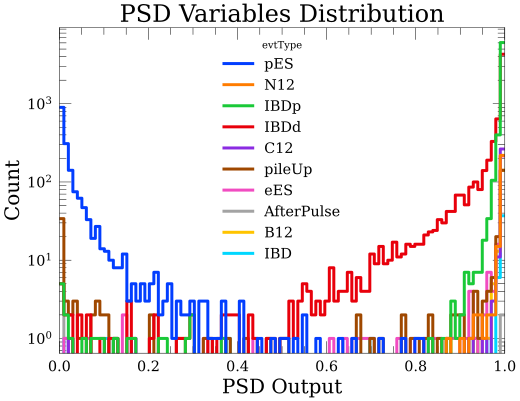

In [94]:
import seaborn as sns
sns.histplot(x="psdVal", data=df_PSD[df_PSD["TagAP"]==0], hue="evtType", fill=False, element="step",palette="bright",
             bins=np.linspace(0,1,100))
plt.xlim(0,1)
plt.semilogy()
plt.xlabel("PSD Output")
plt.title("PSD Variables Distribution")

# Energy Spectrum
## 1. Spectrum After Tagging

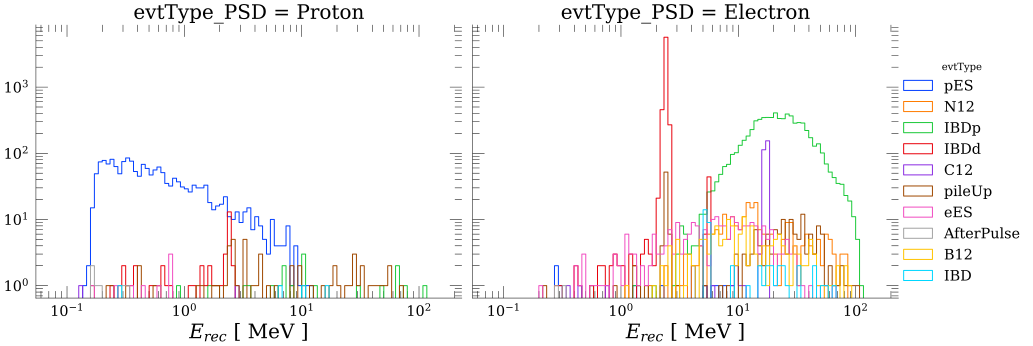

In [95]:
PSD_fg = sns.FacetGrid(df_PSD[df_PSD["TagAP"]==0 ], col="evtType_PSD", hue="evtType",height=5, aspect=1.3,
                       palette="bright" )
PSD_fg.map(plt.hist, "Erec", histtype="step",bins=np.logspace(-1.1,2.2,100))
plt.semilogy()
plt.semilogx()
PSD_fg.add_legend()
# plt.xlabel("$E_{rec}$ [ MeV ]")
PSD_fg.set_axis_labels("$E_{rec}$ [ MeV ]")

## 2. Spectrum Comparison After PSD

0         True
1         True
2         True
3         True
4        False
         ...  
18663     True
18664    False
18665    False
18666    False
18667    False
Name: evtType, Length: 18668, dtype: bool


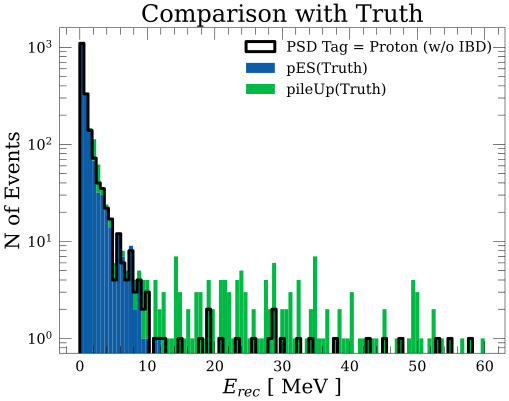

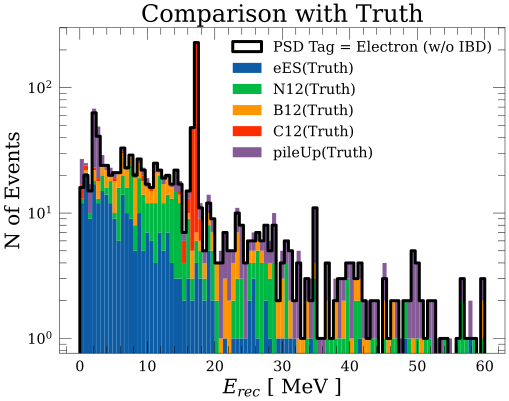

In [96]:
v_options = [("Proton",["pES","pileUp"]), ("Electron", ["eES", "N12", "B12", "C12","pileUp"])]

print(df_PSD["evtType"].apply(lambda x:True if "IBD" not in x else False))

E_bins = np.linspace(0,60, 100)
for option in v_options:
    plt.figure()
    tag, v_tag_truth = option
    plt.hist( df_PSD["Erec"][(df_PSD["evtType_PSD"]==tag) & (df_PSD["TagAP"]==0) & (df_PSD["evtType"].apply(lambda x:True if "IBD" not in x else False))], bins=E_bins,
              histtype="step", label=f"PSD Tag = {tag} (w/o IBD)", color="black", linewidth=3)
    v2d_Erec = []
    v_labels = []
    for tag_truth in v_tag_truth:
        v2d_Erec.append( np.array(df_PSD["Erec"][(df_PSD["evtType"]==tag_truth) ]) )
        v_labels.append(tag_truth+"(Truth)")

    plt.hist( v2d_Erec, bins=E_bins,ls="--", stacked=True, label=v_labels)
    plt.semilogy()
    plt.legend()
    plt.xlabel("$E_{rec}$ [ MeV ]")
    plt.ylabel("N of Events")
    plt.title("Comparison with Truth")


# 3. Spectrum After IBD Selection

[]

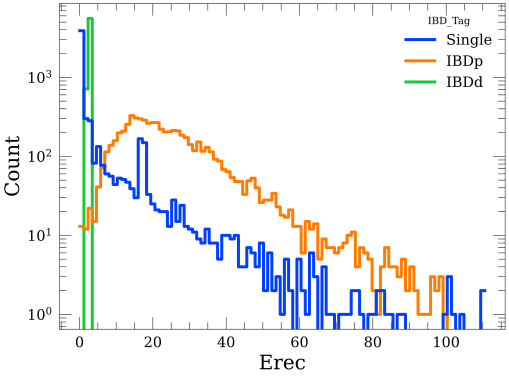

In [97]:
sns.histplot(x='Erec',data=df_PSD, hue="IBD_Tag", fill=False, element="step",palette="bright")
plt.semilogy()

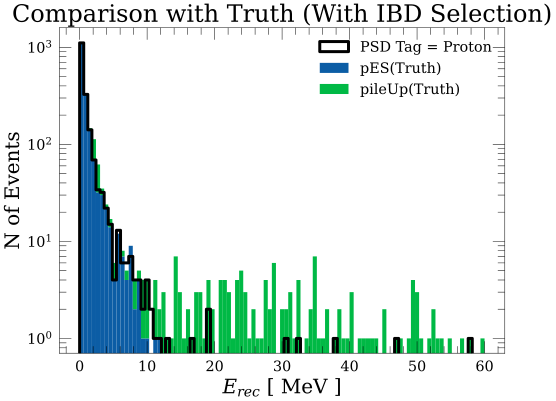

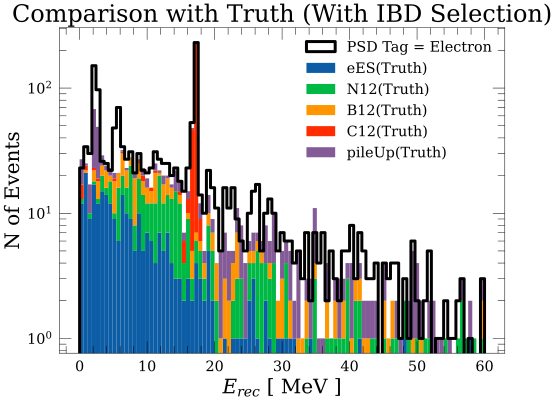

In [134]:
v_options = [("Proton",["pES","pileUp"]), ("Electron", ["eES", "N12", "B12", "C12","pileUp"])]

E_bins = np.linspace(0,60, 100)
for option in v_options:
    plt.figure()
    tag, v_tag_truth = option
    plt.hist( df_PSD["Erec"][(df_PSD["evtType_PSD"]==tag) & (df_PSD["TagAP"]==0) & (df_PSD["IBD_Tag"]=="Single")], bins=E_bins,
              histtype="step", label=f"PSD Tag = {tag}", color="black", linewidth=3)
    v2d_Erec = []
    v_labels = []
    for tag_truth in v_tag_truth:
        v2d_Erec.append( np.array(df_PSD["Erec"][(df_PSD["evtType"]==tag_truth) ]) )
        v_labels.append(tag_truth+"(Truth)")

    plt.hist( v2d_Erec, bins=E_bins,ls="--", stacked=True, label=v_labels)
    plt.semilogy()
    plt.legend()
    plt.xlabel("$E_{rec}$ [ MeV ]")
    plt.ylabel("N of Events")
    plt.title("Comparison with Truth (With IBD Selection)")

# 3. Efficiency Calculation

In [132]:
from IPython.display import display
# PSD Selection
index_single_event = ((df_PSD["TagAP"]==0) & (df_PSD["IBD_Tag"]=="Single") )
v_PSD_Tags = ["Proton", "Electron"]
v_Title = ["pES", "eES+CC+NC"]
df_residue_components = pd.DataFrame()
for PSD_tag, title in zip( v_PSD_Tags, v_Title ):
    df_temp = df_PSD[ index_single_event & (df_PSD["evtType_PSD"]==PSD_tag) ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
    df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
    df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

# IBD Selection
index_IBD_event = ((df_PSD["TagAP"]==0) & (df_PSD["IBD_Tag"]!="Single") )
title="IBD"
df_temp = df_PSD[ index_IBD_event ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

df_residue_components =  df_residue_components.fillna(0)
df_residue_components*100

,pES,eES+CC+NC,IBD
evtType,,,
AfterPulse,0.330215,0.120627,0.000000
C12,0.110072,16.465621,0.054812
IBD,0.220143,2.593486,0.023491
IBDd,1.485966,17.310012,48.696265
IBDp,1.100715,20.566948,49.385326
eES,0.440286,15.862485,0.015660
pES,94.496423,0.663450,0.234907
pileUp,1.816181,2.352232,1.503406
B12,0.000000,9.529554,0.046981


In [128]:
df_PSD["IBD_Tag"].value_counts()

IBDp      6489
IBDd      6286
Single    5893
Name: IBD_Tag, dtype: int64

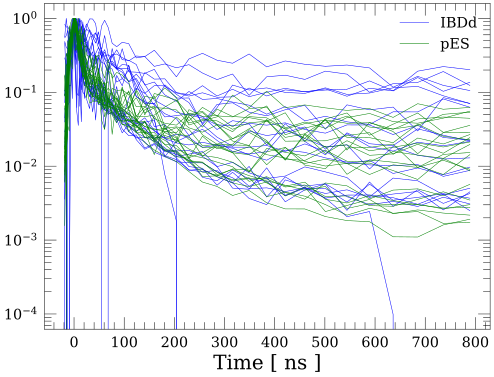

In [100]:
from importlib import reload
import AnalysisTools
reload(AnalysisTools)
from AnalysisTools import  PlotTimeProfileAfterCut

bins = np.loadtxt(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/Bins_Setting.txt", delimiter=",")
PlotTimeProfileAfterCut(df_PSD, bins=bins ,index_cut=( (df_PSD["evtType_PSD"]=="Proton") ),
                        v_tags=["IBDd", "pES"],key_tag="evtType",divide_bin_width=True, one_plot=True )

# plt.figure()
# PlotTimeProfileAfterCut(df_PSD, bins=bins ,index_cut=( (df_PSD["evtType_PSD"]=="Electron") ),
#                         v_tags=["IBDp", "pES","eES"],key_tag="evtType", divide_bin_width=True, one_plot=True)
# for h_time in df_PSD["h_time_with_charge"][]:
#     print(h_time)
#     break